In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

import glob as glob
import os as os
import six

import matplotlib.gridspec as gridspec
import seaborn as sb
import pickle as pkl

sb.set_color_codes()
sb.set_palette("hls")  

from scipy.stats import spearmanr

import matplotlib.gridspec as gridspec

sb.set_style("white")
sb.set_context(rc = {'patch.linewidth': 0.0})

In [2]:
gray = '#0075b0'
mov_grat= '#f32974'
pix_noise = '#ff7047'
stat_grat = '#869fdc'

gray_100 = '#004264'
gray_75 = '#0075b0'
gray_50 = '#00a8fd'

mov_grat_50 = '#f771a3'
mov_grat_75 = '#f32974'
mov_grat_100 = '#c40b50'

gradient_grey = [gray_50, gray_75, gray_100]
gradient_moving = [mov_grat_50, mov_grat_75, mov_grat_100]

In [3]:
#low and high-pass filters
def highpass1(signal, tau):
    ''' first order high-pass '''
    N = len(signal)
    tau = float(tau)
    out = np.zeros(N)
    alpha = (tau / (tau + 1))

    out[0] = 0. # initial condition
    for i in np.arange(1,N):
        out[i] = (signal[i] - signal[i-1]) * alpha + out[i-1] * alpha
        #out[i] = (signal[i] - signal[i-1]) * (1.+alpha)/2. + out[i-1] * alpha

    return out

def lowpass1(signal, tau):
    ''' first order low-pass '''
    N = len(signal)
    tau = float(tau)
    out = np.zeros(N)
    alpha = (tau / (tau + 1))

    out[0] = signal[0] # initial condition
    for i in np.arange(1,N):
        out[i] = signal[i] * (1. - alpha) + out[i-1] * alpha

    return out

In [4]:
def rect(x, n):
    x[x<n] = 0
    return x

def bandpass(x,tau_hp, tau_lp):
    x_new = highpass1(lowpass1(x, tau_lp), tau_hp)
    return x_new

In [5]:
def process_signals(myamp,sat_fac,switch):
    
    inp=calc_input(myamp)
    x=bpfilter_input(inp)
    if switch==1:
        y=stationary_NL(x,sat_fac)
    if switch==2:
        y=dynamic_NL(x,sat_fac)
    z=lowpass1(y,tau_ca)
    
    return inp,x,y,z

def calc_input(amp):
    
    x=np.zeros(maxtime)
    x[starttime:starttime+1000]=amp
    
    return x

def bpfilter_input(x):
    
    y=bandpass(x,tau_hp, tau_lp)
    y=rect(y,0)
    
    return y

def stationary_NL(x,sat_fac):
    
    Eexc=1.0
    
    y=x/(x+sat_fac)*Eexc
    
    return y

def dynamic_NL(x,sat_fac,Cdeltat=100.0):
           
    y=np.zeros_like(x)
    Eexc=1.0
    
    for t in range(maxtime-1):
        
        y[t+1]=(x[t]*Eexc+y[t]*Cdeltat)/(x[t]+sat_fac+Cdeltat)
        
    return y

In [6]:
# -*- coding: utf-8 -*-


maxtime=2000
tau_hp=300
tau_lp=200
tau_ca=200

#stat_sat_fac=0.2
stat_sat_fac=0.2
movg_sat_fac=1.0

myamp1=1.00
myamp2=0.10

starttime=50

color_grey = '#0075b0'
color_moving = '#f32974'

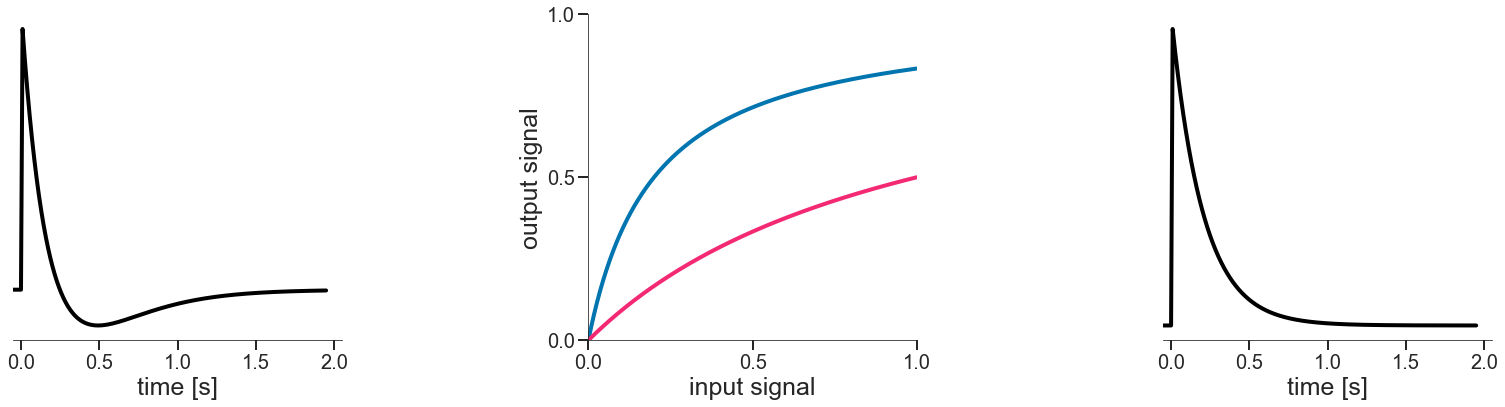

In [7]:
#Figure 4(A)

fig = plt.figure(figsize = (26.5,6))
gs1 = gridspec.GridSpec(1, 3, wspace = .75)

with sb.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    ax3 = plt.subplot(gs1[0,2])

mylw=4
label_size = 25
tick_size = 20
ylim = [0,1]
xlim = [0,2100]
xticks = np.arange(5)*500+50
xticklabels = np.arange(0,5.5, 0.5)

x=np.zeros(2000)
x[starttime:starttime+10]=1.0
y=bandpass(x,tau_hp,tau_lp)
ax1.plot(np.arange(maxtime),y,linewidth=mylw,color='black')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.tick_params(left=False,labelleft=False)
ax1.set_xlim(xlim)
ax1.set_xlabel('time [s]', fontsize = label_size)
sb.despine(ax = ax1, left = True)
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()



x=np.arange(1000)*0.001
y1=stationary_NL(x,stat_sat_fac)
y2=stationary_NL(x,movg_sat_fac)

ax2.plot(x,y1,linewidth=mylw,color=color_grey,label='static bg')
ax2.plot(x,y2,linewidth=mylw,color=color_moving,label='movg bg')
ax2.set_xlim(ylim)
ax2.set_ylim(ylim)
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
ax2.set_xlabel('input signal', fontsize = label_size)
ax2.set_ylabel('output signal', fontsize = label_size)
sb.despine(ax = ax2)
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
ax2.set_xticks(np.arange(0, 1.5, 0.5))
ax2.set_yticks(np.arange(0, 1.5, 0.5))


x=np.zeros(2000)
x[starttime:starttime+10]=1.0
y=lowpass1(x,tau_ca)
ax3.plot(np.arange(maxtime),y,linewidth=mylw,color='black')
ax3.set_xticks(np.arange(5)*500+50)
ax3.set_xticklabels(np.arange(0,5.5, 0.5))
ax3.tick_params(left=False,labelleft=False)
ax3.set_xlim(xlim)
ax3.set_xlabel('time [s]', fontsize = label_size)
sb.despine(ax = ax3, left = True)
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
ax3.tick_params(direction='out', length=10, width=2)
ax3.xaxis.tick_bottom()

(-0.05, 1.1)

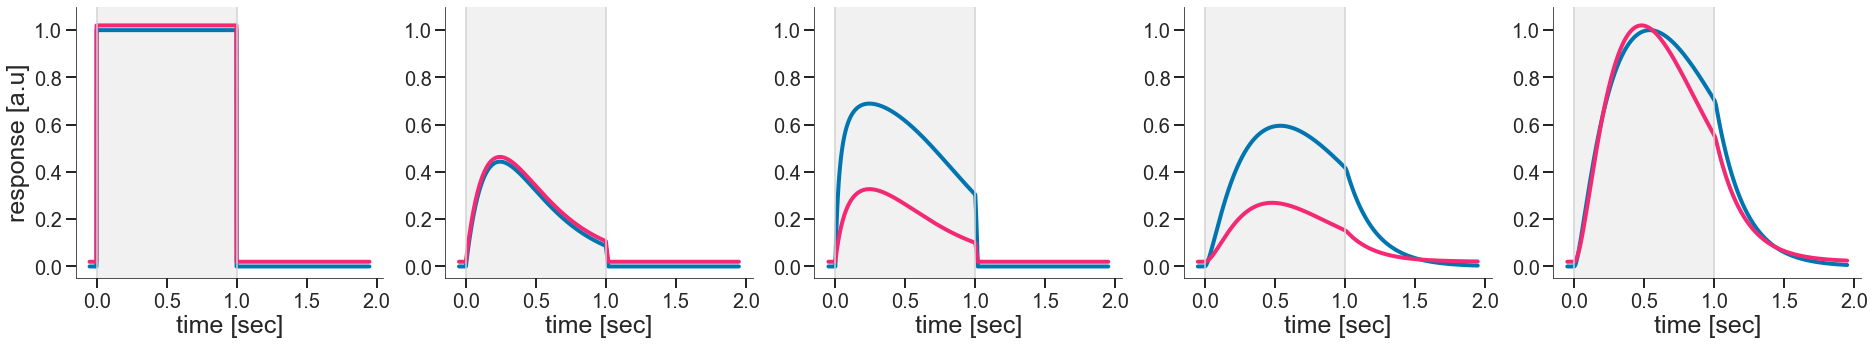

In [12]:
#Figure 4(B)

fig = plt.figure(figsize = (32,5))
gs1 = gridspec.GridSpec(1, 5)

with sb.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    ax3 = plt.subplot(gs1[0,2])
    ax4 = plt.subplot(gs1[0,3])
    ax5 = plt.subplot(gs1[0,4])
    
mylw=4
label_size = 25
tick_size = 20
ylim = [-0.05,1.1]
xlim = [0,2100]
xticks = np.arange(5)*500+50
xticklabels = np.arange(0,5.5, 0.5)

offset = 0.02


#myamp=[0.2,0.5,1.0]
myamp=[0.2,1.0]

#grey
inp,x,y,z=process_signals(myamp[-1],stat_sat_fac,1)
ax1.plot(np.arange(maxtime),inp,linewidth=mylw, color = color_grey)
ax2.plot(np.arange(maxtime),x,linewidth=mylw, color = color_grey)
ax3.plot(y,linewidth=mylw, color = color_grey)
ax4.plot(z,linewidth=mylw, color = color_grey)
ax5.plot(z/np.max(z),linewidth=mylw, color = color_grey)

#moving
inp,x,y,z=process_signals(myamp[-1],movg_sat_fac,1)
ax1.plot(np.arange(maxtime),inp+offset,linewidth=mylw, color = color_moving)
ax2.plot(np.arange(maxtime),x+offset,linewidth=mylw, color = color_moving)
ax3.plot(y+offset,linewidth=mylw, color = color_moving)
ax4.plot(z+offset,linewidth=mylw, color = color_moving)
ax5.plot(z/np.max(z)+offset,linewidth=mylw, color = color_moving)

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(np.arange(0, 1.2, 0.2))
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax1)
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
ax1.axvline(starttime, color = 'lightgrey')
ax1.axvline(starttime+1000, color = 'lightgrey')
ax1.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax2)
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
ax2.axvline(starttime, color = 'lightgrey')
ax2.axvline(starttime+1000, color = 'lightgrey')
ax2.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)
ax3.set_yticks(np.arange(0, 1.2, 0.2))
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax3)
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
ax3.axvline(starttime, color = 'lightgrey')
ax3.axvline(starttime+1000, color = 'lightgrey')
ax3.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax3.tick_params(direction='out', length=10, width=2)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()

ax4.set_xticks(xticks)
ax4.set_xticklabels(xticklabels)
ax4.set_yticks(np.arange(0, 1.2, 0.2))
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax4)
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
ax4.axvline(starttime, color = 'lightgrey')
ax4.axvline(starttime+1000, color = 'lightgrey')
ax4.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax4.tick_params(direction='out', length=10, width=2)
ax4.xaxis.tick_bottom()
ax4.yaxis.tick_left()

ax5.set_xticks(xticks)
ax5.set_xticklabels(xticklabels)
ax5.set_yticks(np.arange(0, 1.2, 0.2))
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax5)
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
ax5.axvline(starttime, color = 'lightgrey')
ax5.axvline(starttime+1000, color = 'lightgrey')
ax5.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
ax1.set_ylabel('response [a.u]', fontsize = label_size)
ax1.set_xlabel('time [sec]', fontsize = label_size)
ax2.set_xlabel('time [sec]', fontsize = label_size)
ax3.set_xlabel('time [sec]', fontsize = label_size)
ax4.set_xlabel('time [sec]', fontsize = label_size)
ax5.set_xlabel('time [sec]', fontsize = label_size)

ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(ylim)
ax5.set_ylim(ylim)

(-0.05, 1.1)

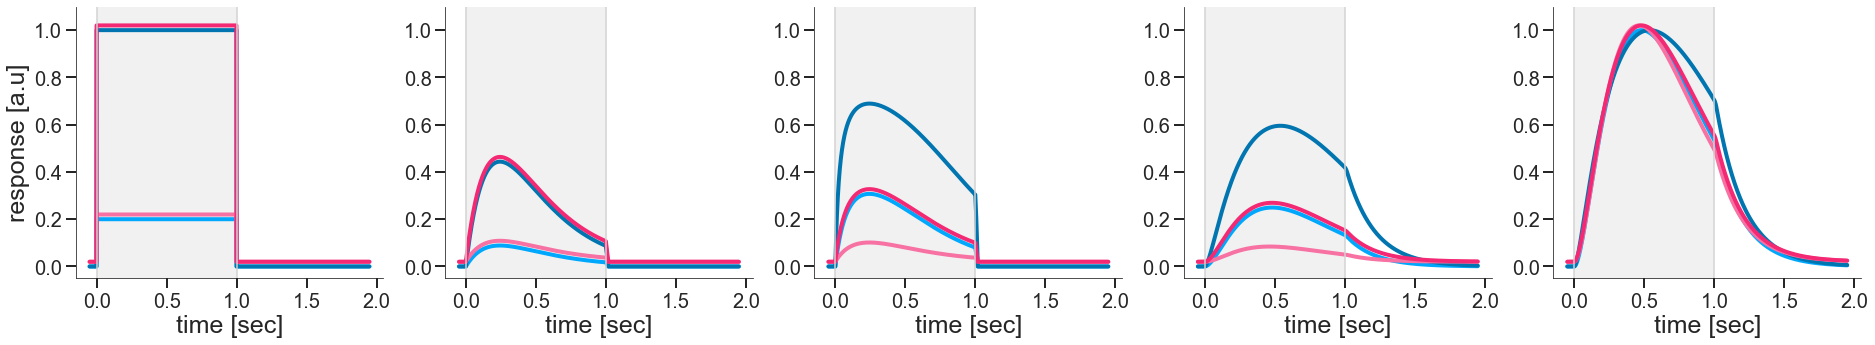

In [14]:
#Figure 4(C)

fig = plt.figure(figsize = (32,5))
gs1 = gridspec.GridSpec(1, 5)

with sb.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    ax3 = plt.subplot(gs1[0,2])
    ax4 = plt.subplot(gs1[0,3])
    ax5 = plt.subplot(gs1[0,4])
    
mylw=4
label_size = 25
tick_size = 20
ylim = [-0.05,1.1]
xlim = [0,2100]
xticks = np.arange(5)*500+50
xticklabels = np.arange(0,5.5, 0.5)

offset = 0.02


myamp=[0.2,0.5,1.0]
myamp=[0.2,1.0]

#grey
for i in range(len(myamp)):

    inp,x,y,z=process_signals(myamp[i],stat_sat_fac,1)       
    ax1.plot(np.arange(maxtime),inp,linewidth=mylw, color = gradient_grey[i])
    ax2.plot(np.arange(maxtime),x,linewidth=mylw, color = gradient_grey[i])
    ax3.plot(y,linewidth=mylw, color = gradient_grey[i])
    ax4.plot(z,linewidth=mylw, color = gradient_grey[i])
    ax5.plot(z/np.max(z),linewidth=mylw, color = gradient_grey[i])

#moving
for i in range(len(myamp)):
    inp,x,y,z=process_signals(myamp[i],movg_sat_fac,1)
    ax1.plot(np.arange(maxtime),inp+offset,linewidth=mylw, color = gradient_moving[i])
    ax2.plot(np.arange(maxtime),x+offset,linewidth=mylw, color = gradient_moving[i])
    ax3.plot(y+offset,linewidth=mylw, color = gradient_moving[i])
    ax4.plot(z+offset,linewidth=mylw, color = gradient_moving[i])
    ax5.plot(z/np.max(z)+offset,linewidth=mylw, color = gradient_moving[i])

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(np.arange(0, 1.2, 0.2))
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax1)
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
ax1.axvline(starttime, color = 'lightgrey')
ax1.axvline(starttime+1000, color = 'lightgrey')
ax1.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax2)
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
ax2.axvline(starttime, color = 'lightgrey')
ax2.axvline(starttime+1000, color = 'lightgrey')
ax2.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)
ax3.set_yticks(np.arange(0, 1.2, 0.2))
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax3)
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
ax3.axvline(starttime, color = 'lightgrey')
ax3.axvline(starttime+1000, color = 'lightgrey')
ax3.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax3.tick_params(direction='out', length=10, width=2)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()

ax4.set_xticks(xticks)
ax4.set_xticklabels(xticklabels)
ax4.set_yticks(np.arange(0, 1.2, 0.2))
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax4)
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
ax4.axvline(starttime, color = 'lightgrey')
ax4.axvline(starttime+1000, color = 'lightgrey')
ax4.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax4.tick_params(direction='out', length=10, width=2)
ax4.xaxis.tick_bottom()
ax4.yaxis.tick_left()

ax5.set_xticks(xticks)
ax5.set_xticklabels(xticklabels)
ax5.set_yticks(np.arange(0, 1.2, 0.2))
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax5)
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
ax5.axvline(starttime, color = 'lightgrey')
ax5.axvline(starttime+1000, color = 'lightgrey')
ax5.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
ax1.set_ylabel('response [a.u]', fontsize = label_size)
ax1.set_xlabel('time [sec]', fontsize = label_size)
ax2.set_xlabel('time [sec]', fontsize = label_size)
ax3.set_xlabel('time [sec]', fontsize = label_size)
ax4.set_xlabel('time [sec]', fontsize = label_size)
ax5.set_xlabel('time [sec]', fontsize = label_size)

ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(ylim)
ax5.set_ylim(ylim)

(-0.05, 1.1)

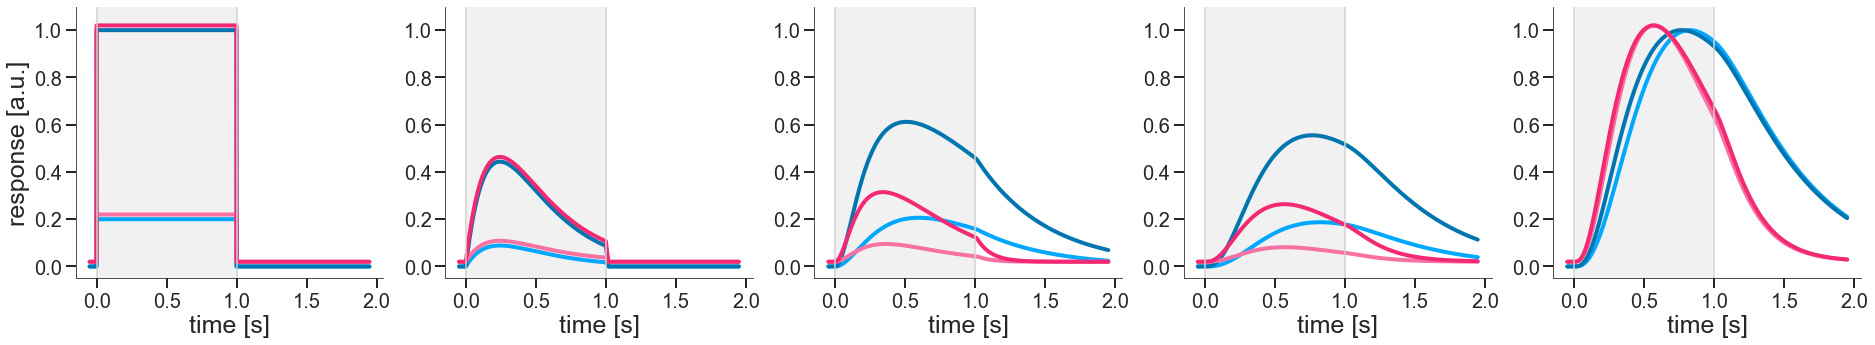

In [17]:
#Figure 4(D)

fig = plt.figure(figsize = (32,5))
gs1 = gridspec.GridSpec(1, 5)

with sb.axes_style('white'):
    ax1 = plt.subplot(gs1[0,0])
    ax2 = plt.subplot(gs1[0,1])
    ax3 = plt.subplot(gs1[0,2])
    ax4 = plt.subplot(gs1[0,3])
    ax5 = plt.subplot(gs1[0,4])
    
mylw=4
label_size = 25
tick_size = 20
ylim = [-0.05,1.1]
xlim = [0,2100]
xticks = np.arange(5)*500+50
xticklabels = np.arange(0,5.5, 0.5)

offset = 0.02


myamp=[0.2,0.5,1.0]
myamp=[0.2,1.0]

#grey
for i in range(len(myamp)):

    inp,x,y,z=process_signals(myamp[i],stat_sat_fac,2)   
    ax1.plot(np.arange(maxtime),inp,linewidth=mylw, color = gradient_grey[i])
    ax2.plot(np.arange(maxtime),x,linewidth=mylw, color = gradient_grey[i])
    ax3.plot(y,linewidth=mylw, color = gradient_grey[i])
    ax4.plot(z,linewidth=mylw, color = gradient_grey[i])
    ax5.plot(z/np.max(z),linewidth=mylw, color = gradient_grey[i])

#moving
for i in range(len(myamp)):
    inp,x,y,z=process_signals(myamp[i],movg_sat_fac,2)
    ax1.plot(np.arange(maxtime),inp+offset,linewidth=mylw, color = gradient_moving[i])
    ax2.plot(np.arange(maxtime),x+offset,linewidth=mylw, color = gradient_moving[i])
    ax3.plot(y+offset,linewidth=mylw, color = gradient_moving[i])
    ax4.plot(z+offset,linewidth=mylw, color = gradient_moving[i])
    ax5.plot(z/np.max(z)+offset,linewidth=mylw, color = gradient_moving[i])

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(np.arange(0, 1.2, 0.2))
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax1)
ax1.tick_params(axis="x", labelsize=tick_size)
ax1.tick_params(axis="y", labelsize=tick_size)
ax1.axvline(starttime, color = 'lightgrey')
ax1.axvline(starttime+1000, color = 'lightgrey')
ax1.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax1.tick_params(direction='out', length=10, width=2)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels)
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax2)
ax2.tick_params(axis="x", labelsize=tick_size)
ax2.tick_params(axis="y", labelsize=tick_size)
ax2.axvline(starttime, color = 'lightgrey')
ax2.axvline(starttime+1000, color = 'lightgrey')
ax2.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax2.tick_params(direction='out', length=10, width=2)
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

ax3.set_xticks(xticks)
ax3.set_xticklabels(xticklabels)
ax3.set_yticks(np.arange(0, 1.2, 0.2))
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax3)
ax3.tick_params(axis="x", labelsize=tick_size)
ax3.tick_params(axis="y", labelsize=tick_size)
ax3.axvline(starttime, color = 'lightgrey')
ax3.axvline(starttime+1000, color = 'lightgrey')
ax3.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax3.tick_params(direction='out', length=10, width=2)
ax3.xaxis.tick_bottom()
ax3.yaxis.tick_left()

ax4.set_xticks(xticks)
ax4.set_xticklabels(xticklabels)
ax4.set_yticks(np.arange(0, 1.2, 0.2))
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax4)
ax4.tick_params(axis="x", labelsize=tick_size)
ax4.tick_params(axis="y", labelsize=tick_size)
ax4.axvline(starttime, color = 'lightgrey')
ax4.axvline(starttime+1000, color = 'lightgrey')
ax4.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax4.tick_params(direction='out', length=10, width=2)
ax4.xaxis.tick_bottom()
ax4.yaxis.tick_left()

ax5.set_xticks(xticks)
ax5.set_xticklabels(xticklabels)
ax5.set_yticks(np.arange(0, 1.2, 0.2))
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
sb.despine(ax = ax5)
ax5.tick_params(axis="x", labelsize=tick_size)
ax5.tick_params(axis="y", labelsize=tick_size)
ax5.axvline(starttime, color = 'lightgrey')
ax5.axvline(starttime+1000, color = 'lightgrey')
ax5.axvspan(starttime, starttime+1000, color='lightgrey', alpha = 0.3)
ax5.tick_params(direction='out', length=10, width=2)
ax5.xaxis.tick_bottom()
ax5.yaxis.tick_left()
ax1.set_ylabel('response [a.u.]', fontsize = label_size)
ax1.set_xlabel('time [s]', fontsize = label_size)
ax2.set_xlabel('time [s]', fontsize = label_size)
ax3.set_xlabel('time [s]', fontsize = label_size)
ax4.set_xlabel('time [s]', fontsize = label_size)
ax5.set_xlabel('time [s]', fontsize = label_size)

ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(ylim)
ax5.set_ylim(ylim)

#plt.savefig('model_dynamic_amps.pdf',bbox_inches='tight')